# Visualization and inspection of generated embeddings for QataCOV dataset

### BioBERT embeddings

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import torch

In [9]:
# UMAP is optional but recommended
try:
    import umap  # pip install umap-learn
    HAS_UMAP = True
except Exception:
    HAS_UMAP = False


emb_path = "/leonardo_work/IscrC_narc2/reports_project/QaTa-COV19/Text_Embeddings/BioBERT/CLS/reports_emb.npy"
X = np.load(emb_path)

X = np.squeeze(X)
assert X.ndim == 2, f"Expected [N, D], got {X.shape}"

print("Loaded BioBERT CLS embeddings:", X.shape)


Loaded BioBERT CLS embeddings: (283, 768)


/leonardo/home/userexternal/ldelgaud/.conda/envs/timemil/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


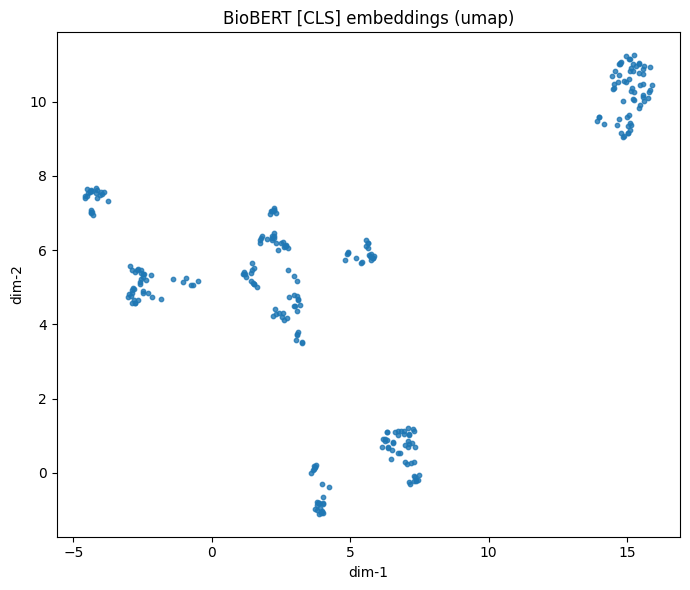

In [5]:
# Standardize + PCA pre-step (good default)
Xs = StandardScaler().fit_transform(X)
Xp = PCA(n_components=min(50, Xs.shape[1]), random_state=0).fit_transform(Xs)

# Choose ONE method:
method = "umap"   # "umap" | "tsne" | "pca2"

if method == "pca2":
    Z = PCA(n_components=2, random_state=0).fit_transform(Xp)

elif method == "tsne":
    Z = TSNE(
        n_components=2,
        perplexity=30,
        learning_rate="auto",
        init="pca",
        random_state=0
    ).fit_transform(Xp)

elif method == "umap":
    if not HAS_UMAP:
        raise RuntimeError("UMAP not installed. Run: pip install umap-learn")
    Z = umap.UMAP(
        n_components=2,
        n_neighbors=30,
        min_dist=0.1,
        metric="cosine",
        random_state=0,
    ).fit_transform(Xp)

else:
    raise ValueError("method must be 'umap', 'tsne', or 'pca2'")

plt.figure(figsize=(7, 6))
plt.scatter(Z[:, 0], Z[:, 1], s=10, alpha=0.8)
plt.title(f"BioBERT [CLS] embeddings ({method})")
plt.xlabel("dim-1")
plt.ylabel("dim-2")
plt.tight_layout()
plt.show()

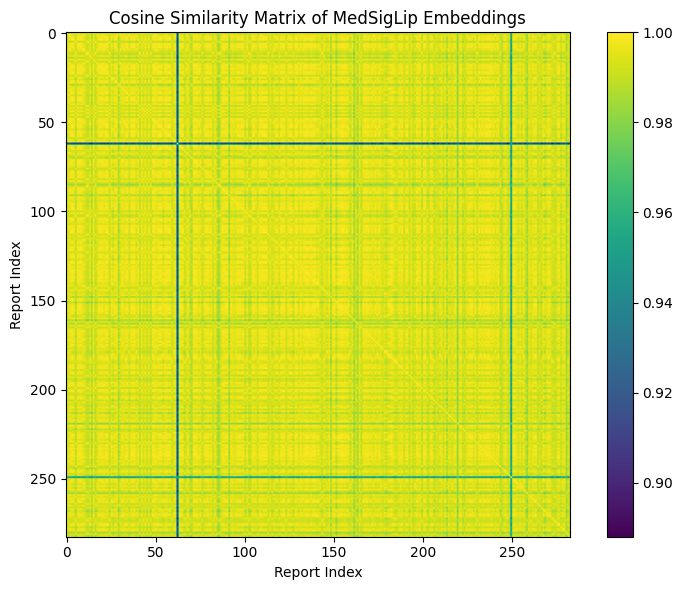

In [10]:
#normalize embeddings
normalized_X = torch.nn.functional.normalize(torch.tensor(X), dim=-1).numpy()

#compute the dot product similarity matrix
similarity_matrix = normalized_X @ normalized_X.T

#plot the similarity matrix
plt.figure(figsize=(8, 6))
plt.imshow(similarity_matrix, cmap='viridis')
plt.colorbar()
plt.title("Cosine Similarity Matrix of MedSigLip Embeddings")
plt.xlabel("Report Index")
plt.ylabel("Report Index")
plt.tight_layout()
plt.show()

### MedSigLIP embeddings

In [6]:
emb_path = "/leonardo_work/IscrC_narc2/reports_project/QaTa-COV19/Text_Embeddings/MedSigLip/reports_emb.npy"
X = np.load(emb_path)

X = np.squeeze(X)
assert X.ndim == 2, f"Expected [N, D], got {X.shape}"

print("Loaded MedSigLip embeddings:", X.shape)

Loaded MedSigLip embeddings: (283, 1152)


/leonardo/home/userexternal/ldelgaud/.conda/envs/timemil/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


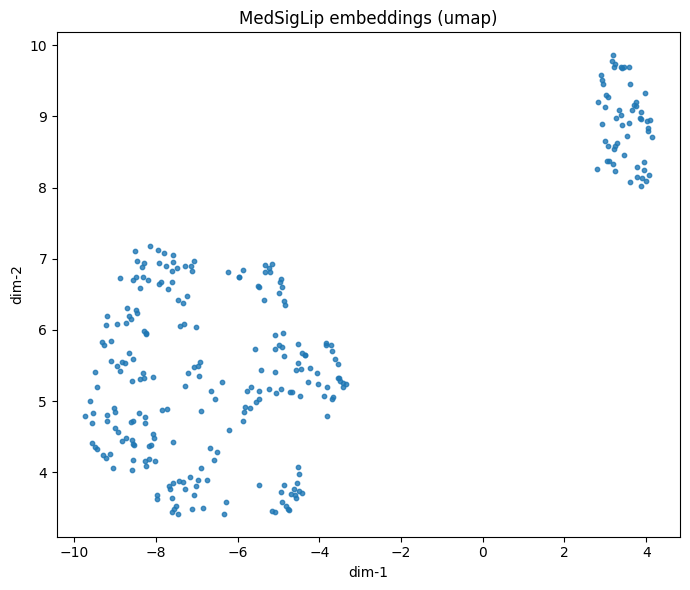

In [7]:
# Standardize + PCA pre-step (good default)
Xs = StandardScaler().fit_transform(X)
Xp = PCA(n_components=min(50, Xs.shape[1]), random_state=0).fit_transform(Xs)

# Choose ONE method:
method = "umap"   # "umap" | "tsne" | "pca2"

if method == "pca2":
    Z = PCA(n_components=2, random_state=0).fit_transform(Xp)

elif method == "tsne":
    Z = TSNE(
        n_components=2,
        perplexity=30,
        learning_rate="auto",
        init="pca",
        random_state=0
    ).fit_transform(Xp)

elif method == "umap":
    if not HAS_UMAP:
        raise RuntimeError("UMAP not installed. Run: pip install umap-learn")
    Z = umap.UMAP(
        n_components=2,
        n_neighbors=30,
        min_dist=0.1,
        metric="cosine",
        random_state=0,
    ).fit_transform(Xp)

else:
    raise ValueError("method must be 'umap', 'tsne', or 'pca2'")

plt.figure(figsize=(7, 6))
plt.scatter(Z[:, 0], Z[:, 1], s=10, alpha=0.8)
plt.title(f"MedSigLip embeddings ({method})")
plt.xlabel("dim-1")
plt.ylabel("dim-2")
plt.tight_layout()
plt.show()

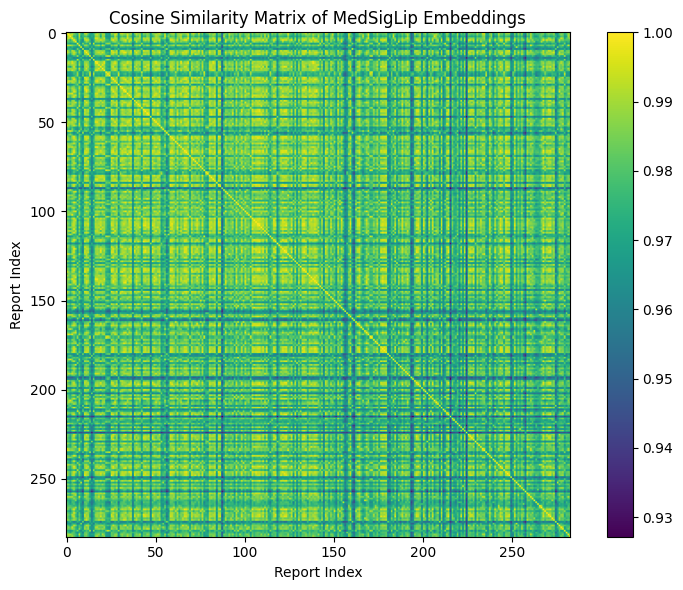

In [8]:
#normalize embeddings
normalized_X = torch.nn.functional.normalize(torch.tensor(X), dim=-1).numpy()

#compute the dot product similarity matrix
similarity_matrix = normalized_X @ normalized_X.T

#plot the similarity matrix
plt.figure(figsize=(8, 6))
plt.imshow(similarity_matrix, cmap='viridis')
plt.colorbar()
plt.title("Cosine Similarity Matrix of MedSigLip Embeddings")
plt.xlabel("Report Index")
plt.ylabel("Report Index")
plt.tight_layout()
plt.show()